## Exercise 1: Structuring a given code

### original

In [2]:
file_path = input("Enter the path to the CSV file: ")
records = []
with open(file_path, 'r') as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:
        records.append(row)

total = sum(float(record['Grade']) for record in records)
average = total / len(records)

print(f"Average Grade: {average}")
print("--------------------")

filtered_records = [record for record in records if float(record['Grade']) >= 80.0]

print("Student Report")
print("--------------")
for record in filtered_records:
    print(f"Name: {record['Name']}")
    print(f"Grade: {record['Grade']}")
    print("--------------------")


### changed

In [ ]:
#code used to load in the csv file
file_path = input("Enter the path to the CSV file: ")
records = []
with open(file_path, 'r') as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:
        records.append(row)
#this function return the average grade of all students from the inputted list
def avg_grade(inpt):
    total = sum(float(record['Grade']) for record in inpt)
    return total / len(records)
def avg_grade_print(inpt):
    print(f"Average Grade: {inpt}")
    print("--------------------")
#this function return a list of all students who achieved a grade higher that 80.0
def starstudents(inpt):
    return [item for item in inpt if float(item['Grade']) >= 80.0]

#this function prints the name and grade of all student in the input list
def student_report_print(inpt):
    print("Student Report")
    print("--------------")
    for record in inpt:
        print(f"Name: {record['Name']}")
        print(f"Grade: {record['Grade']}")
        print("--------------------")
#the part of the code that caused the desired values in the records to be found
filtered_records = starstudents(records)
average = avg_grade(records)
#prints the desired values
avg_grade_print(average)
student_report_print(filtered_records)



## Exercise 2: Mandelbrot visualisation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

C:\Users\olivi\AppData\Local\Temp\ipykernel_9056\588825099.py:6: RuntimeWarning: overflow encountered in scalar power
  a=np.append(a,a[i]**2+c)
C:\Users\olivi\AppData\Local\Temp\ipykernel_9056\588825099.py:6: RuntimeWarning: invalid value encountered in scalar power
  a=np.append(a,a[i]**2+c)


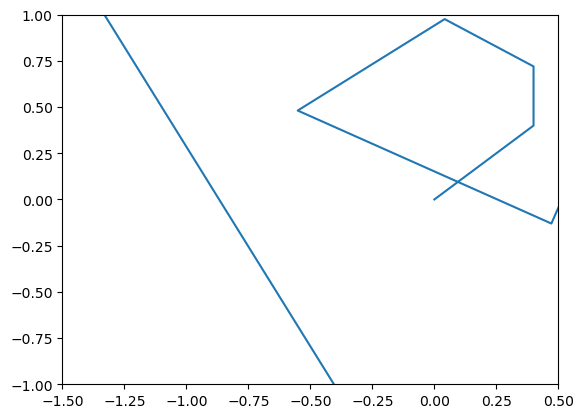

In [20]:
#this function makes a mandelbroth set with n amount of iterations using the complex value x+yj (n,x,y)
def mandelbroth(n,x,y):
    c = complex(x,y)
    a=np.array([0])
    for i in range(n):
        a=np.append(a,a[i]**2+c)
    return a
#this function takes a numpy array of complex numbers and puts these in a matplotlib.pyplot plot
def plot_complex(inpt):
    plt.plot(inpt.real, inpt.imag)
    plt.xlim([-1.5,0.5])
    plt.ylim([-1,1])
#end of defining functions begining in inputing values
plot_complex(mandelbroth(100,0.4,0.4))
#this is wrong probably
#plt.imshow(2darray)

In [22]:
a=np.array([1]*200*200).reshape(200,200)
ii=-1
for n1 in np.arange(-1.5,0.5,1/200*2):
    ii+=1
    i=-1
    for n2 in np.arange(-1,1,1/200*2):
        i+=1
        if abs(mandelbroth(101,n1,n2)[100]) < 2:
            a[i,ii]=0
plt.imshow(a)

C:\Users\olivi\AppData\Local\Temp\ipykernel_9056\588825099.py:6: RuntimeWarning: overflow encountered in scalar power
  a=np.append(a,a[i]**2+c)
C:\Users\olivi\AppData\Local\Temp\ipykernel_9056\588825099.py:6: RuntimeWarning: invalid value encountered in scalar power
  a=np.append(a,a[i]**2+c)


array([ 0.00000000e+000+0.00000000e+000j,
        4.00000000e-001+4.00000000e-001j,
        4.00000000e-001+7.20000000e-001j,
        4.16000000e-002+9.76000000e-001j,
       -5.50845440e-001+4.81203200e-001j,
        4.71874179e-001-1.30137177e-001j,
        6.05729556e-001+2.77183253e-001j,
        6.90077739e-001+7.35796178e-001j,
        3.34811271e-001+1.41551313e+000j,
       -1.49157882e+000+1.34785950e+000j,
        8.08082153e-001-3.62087737e+000j,
       -1.20577561e+001-5.45193275e+000j,
        1.16065912e+002+1.31876151e+002j,
       -3.91962328e+003+3.06130515e+004j,
       -9.21795478e+008-2.39983259e+008j,
        7.92114939e+017+4.42430965e+017j,
        4.31700917e+035+7.00912354e+035j,
       -3.04912446e+071+6.05169011e+071j,
       -2.73257932e+143-3.69047128e+143j,
       -6.15258848e+286+2.01690110e+287j,
                    nan            -infj,
                    nan            +nanj,
                    nan            +nanj,
                    nan           

## Exercise 3: Google PageRank algorithm and the worldwide web